# Global SuperStore Data Investagtion

**Author:** Patrick Earl

Final Project for CSC223 

The global superstore dataset is a fictional retail store containing info about products ordered, orders returned, and the sales people. 

Source of the dataset: https://www.kaggle.com/datasets/shekpaul/global-superstore

## Order Table

Order table contains information about the various orders. These columns specificly hold useful information: 

* **Category:** The category for the product ordered. There are three values: Technology, Furt, Office Supplies
* **Segment:** What type of account is the customer?
* **Order-ID:** Unique ID for the order from the customer. Can be used to link with the returns table

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
orders = pd.read_excel('Global Superstore.xlsx', index_col=0)
orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [7]:
list(orders.columns)

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

In [8]:
orders.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Visualization of a Quanatitive Variable

Going to visualize the discount column from the orders table

<AxesSubplot:>

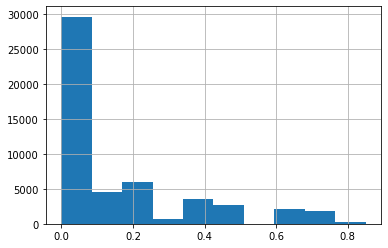

In [9]:
orders['Discount'].hist()

In [15]:
orders.value_counts(subset=['Category', 'Sub-Category']).sort_index()

Category         Sub-Category
Furniture        Bookcases       2411
                 Chairs          3434
                 Furnishings     3170
                 Tables           861
Office Supplies  Appliances      1755
                 Art             4883
                 Binders         6152
                 Envelopes       2435
                 Fasteners       2420
                 Labels          2606
                 Paper           3538
                 Storage         5059
                 Supplies        2425
Technology       Accessories     3075
                 Copiers         2223
                 Machines        1486
                 Phones          3357
dtype: int64

In [16]:
high_discount_orders = orders[orders['Discount'] > 0.75]
high_discount_orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
36607,CA-2014-131254,2014-11-20,2014-11-22,First Class,NC-18415,Nathan Cano,Consumer,Houston,Texas,United States,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820,263.47,High
41071,CA-2011-169019,2011-07-26,2011-07-30,Standard Class,LF-17185,Luke Foster,Consumer,San Antonio,Texas,United States,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,172.07,Medium
32496,CA-2013-130946,2013-04-09,2013-04-13,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464,169.49,High
37559,CA-2013-132479,2013-09-25,2013-09-27,First Class,MK-17905,Michael Kennedy,Corporate,Rockford,Illinois,United States,...,OFF-BI-10004584,Office Supplies,Binders,GBC ProClick 150 Presentation Binding System,442.372,7,0.8,-729.9138,169.09,Critical
36288,US-2014-122714,2014-12-08,2014-12-14,Standard Class,HG-14965,Henry Goldwyn,Corporate,Chicago,Illinois,United States,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,129.51,Medium


In [17]:
high_discount_orders.value_counts(subset=['Category', 'Sub-Category']).sort_index()

Category         Sub-Category
Furniture        Furnishings       4
                 Tables           14
Office Supplies  Appliances       67
                 Binders         233
dtype: int64

<AxesSubplot:>

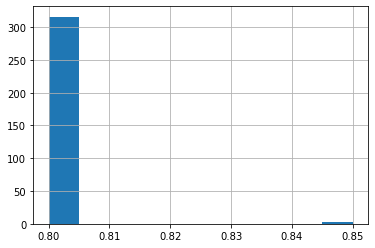

In [19]:
high_discount_orders['Discount'].hist()

#### Quanatitive Summary:

For this I was looking at orders that had a high discount. It was found that certain categories get higher discounts than others. 

## visualization of categorical data

In [20]:
order_count = orders['Category'].value_counts()

In [21]:
order_count

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

<BarContainer object of 3 artists>

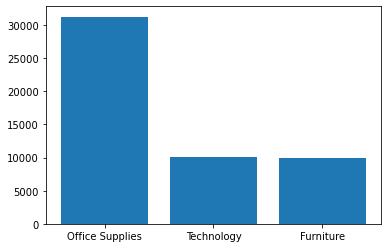

In [22]:
plt.bar(order_count.index, order_count.values)

In [23]:
returns = pd.read_excel('Global Superstore.xlsx', sheet_name=1)
returns.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [24]:
ord_ret = pd.merge(orders, returns)

In [27]:
ord_ret['Customer Name'].value_counts()

Gary Hwang          20
Ted Butterfield     18
Steven Ward         16
Susan Pistek        15
Nat Gilpin          15
                    ..
Todd Sumrall         1
Gary Zandusky        1
Grant Thornton       1
Justin Deggeller     1
Maria Etezadi        1
Name: Customer Name, Length: 543, dtype: int64

Gary Hwang is the customer that makes the most returns. 